In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyecharts
plt.style.use('ggplot')
%matplotlib inline

In [2]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.rc('figure',figsize=(10,10))

In [3]:
data_dm = pd.read_csv(r'E:/数据分析数据集/数据挖掘、机器学习算法实习生需求分析/datamining.csv')
data_ml = pd.read_csv(r'E:/数据分析数据集/数据挖掘、机器学习算法实习生需求分析/machinelearning.csv')
data_al = pd.read_csv(r'E:/数据分析数据集/数据挖掘、机器学习算法实习生需求分析/mlalgorithm.csv')
data = pd.concat([data_dm,data_ml,data_al],ignore_index=True)

In [4]:
data.sample(3)

,auth_capital,city,com_class,com_fullname,com_id,com_intro,com_links,com_location,com_logo,com_name,...,job_deadline,job_detail,job_links,job_title,num_employee,released_time,tag,time_span,update_time,wage
331,注册资本：204.0816万元人民币,北京,公司类型：有限责任公司(自然人投资或控股),远形时空科技（北京）有限公司,注册号：110108021152417,一家视觉SLAM技术公司,https://www.shixiseng.com/com/com_ppg3tltocikm,海淀区王庄路清华同方科技广场D座705室,https://sxsimg.xiaoyuanzhao.com/61/65/61AA24A7...,远形时空,...,2019-03-22,NaN,https://www.shixiseng.com/intern/inn_zpa77asdnvj9,机器学习算法工程师,少于15人,3周前,半导体/芯片,6个月,2018-02-22 16:04:32,200-299/天
145,注册资本：10000万元人民币,北京,公司类型：有限责任公司(自然人投资或控股),人人贷商务顾问（北京）有限公司,注册号：110105012817080,致力为高成长人群提供专业的线上信贷及投资撮合服务,https://www.shixiseng.com/com/com_tssqmwqxkppu,北京市海淀区五道口 清华科技园科技大厦 A座 18层,https://sxsimg.xiaoyuanzhao.com/1D/84/1DF95937...,人人贷,...,2018-03-31,"['接受寒假实习和长期实习', '岗位描述：', '1.\xa0\xa0\xa0\xa0\x...",https://www.shixiseng.com/intern/inn_sfqp6mejf801,数据开发实习生,500-2000人,6天前,数据挖掘,3个月,2018-03-14 21:31:40,100-150/天
955,NaN,北京,NaN,北京三星通信技术研究院,NaN,国家批准认定的高新技术企业及软件企业,https://www.shixiseng.com/com/com_mhuvufadu4j3,北京市朝阳区太阳宫中路12A号太阳宫大厦18层,https://sxsimg.xiaoyuanzhao.com/2A/9C/2AAC7C13...,北京三星,...,2018-12-31,['2. 熟悉基于深度学习的目标检测(object detection)或目标跟踪(visu...,https://www.shixiseng.com/intern/inn_9bkay4gfnzni,视频目标检测算法实习生,500-2000人,2月前,算法,3个月,2017-12-26 13:13:33,200-260/天


In [5]:
data.loc[666]

auth_capital                                      注册资本：130.2083万人民币
city                                                             上海
com_class                                 公司类型：股份有限公司(台港澳与境内合资、未上市)
com_fullname                                         纵目科技（上海）股份有限公司
com_id                                            组织机构代码：06087276-7
com_intro                               成为立足中国面向世界的从辅助驾驶到自动驾驶的技术引领者
com_links            https://www.shixiseng.com/com/com_k0gejst3xf8x
com_location                                北京市昌平区回龙观东大街腾讯总创空间B座535
com_logo          https://sxsimg.xiaoyuanzhao.com/7B/C2/7B75BE25...
com_name                                                       纵目科技
com_website                               http://www.zongmutech.com
com_welfare       ['发展潜力大', '活跃的工作环境', '团队体验', '棒棒的', '开放创新', '追...
day_per_week                                                   4天/周
detailed_intro    \n纵目科技成立于2013年1月，总部位于上海浦东张江高科技园区，在北京及深圳分别设有研发分...
est_date                                        

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   auth_capital    906 non-null    object
 1   city            974 non-null    object
 2   com_class       954 non-null    object
 3   com_fullname    974 non-null    object
 4   com_id          906 non-null    object
 5   com_intro       974 non-null    object
 6   com_links       978 non-null    object
 7   com_location    978 non-null    object
 8   com_logo        974 non-null    object
 9   com_name        974 non-null    object
 10  com_website     865 non-null    object
 11  com_welfare     978 non-null    object
 12  day_per_week    978 non-null    object
 13  detailed_intro  912 non-null    object
 14  est_date        906 non-null    object
 15  industry        960 non-null    object
 16  job_academic    978 non-null    object
 17  job_deadline    978 non-null    object
 18  job_detail

In [7]:
data.drop_duplicates('job_links',inplace=True)
data.shape

(878, 27)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 977
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   auth_capital    812 non-null    object
 1   city            874 non-null    object
 2   com_class       856 non-null    object
 3   com_fullname    874 non-null    object
 4   com_id          812 non-null    object
 5   com_intro       874 non-null    object
 6   com_links       878 non-null    object
 7   com_location    878 non-null    object
 8   com_logo        874 non-null    object
 9   com_name        874 non-null    object
 10  com_website     773 non-null    object
 11  com_welfare     878 non-null    object
 12  day_per_week    878 non-null    object
 13  detailed_intro  818 non-null    object
 14  est_date        812 non-null    object
 15  industry        862 non-null    object
 16  job_academic    878 non-null    object
 17  job_deadline    878 non-null    object
 18  job_detail

In [9]:
data = data.fillna('无')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 977
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   auth_capital    878 non-null    object
 1   city            878 non-null    object
 2   com_class       878 non-null    object
 3   com_fullname    878 non-null    object
 4   com_id          878 non-null    object
 5   com_intro       878 non-null    object
 6   com_links       878 non-null    object
 7   com_location    878 non-null    object
 8   com_logo        878 non-null    object
 9   com_name        878 non-null    object
 10  com_website     878 non-null    object
 11  com_welfare     878 non-null    object
 12  day_per_week    878 non-null    object
 13  detailed_intro  878 non-null    object
 14  est_date        878 non-null    object
 15  industry        878 non-null    object
 16  job_academic    878 non-null    object
 17  job_deadline    878 non-null    object
 18  job_detail

In [11]:
data_clean = data.drop(['com_id', 'com_links', 'com_location', 'com_website', 
                 'com_welfare', 'detailed_intro', 'job_detail'], axis = 1)

In [12]:
data.auth_capital.sample(20)

470       注册资本：10 万元人民币
268     注册资本：100 万元 人民币
133            注册资本：10万
497           注册资本：180万
680    注册资本：560000万元人民币
728     注册资本：350 万元 人民币
763       注册资本：600万元人民币
194        注册资本：1000 万元
486        注册资本：2000 万元
513       注册资本：500万元人民币
419         注册资本：100 万元
224      注册资本：1000万元人民币
902                   无
745        注册资本：7000 万元
897       注册资本：1000万人民币
841      注册资本：974.8万人民币
908              注册资本：无
757        注册资本：7000 万元
777     注册资本：100 万元 人民币
593         注册资本：70万人民币
Name: auth_capital, dtype: object

In [13]:
auth_capital = data['auth_capital'].str.split("：",expand=True)
# print(auth_capital)
auth_capital.sample(5)

,0,1
285,注册资本,3000 万元 美元
769,注册资本,2023.06万元人民币
918,注册资本,1300万美元
25,注册资本,无
619,注册资本,无


In [14]:
auth_capital['num'] = auth_capital[1].str.extract('([0-9.]+)', expand=False).astype('float')
auth_capital.sample(5)

,0,1,num
233,注册资本,4520 万元 美元,4520.0000
445,注册资本,无,NaN
947,注册资本,3000 万元 美元,3000.0000
562,注册资本,346.153800万人民币,346.1538
66,注册资本,100 万元,100.0000


In [15]:
auth_capital[1].str.split('万',expand=True)[1].unique()

array(['美元', '人民币', '元美元', None, '元人民币', '人民币元', '元', '元 人民币', '', '元 美元',
       '元港元（港币）', '港币', '香港元', '欧元', '元 港元（港币）'], dtype=object)

In [16]:
def get_ex_rate(string):
    if string == None:
        return np.nan
    if '人民币' in string:
        return 1.00
    elif '港' in string:
        return 0.8
    elif '美元' in string:
        return 6.29
    elif '欧元' in string:
        return 7.73
    elif '万' in string:
        return 1.00
    else:
        return np.nan

auth_capital['ex_rate'] = auth_capital[1].apply(get_ex_rate)
auth_capital.sample(5)

,0,1,num,ex_rate
966,注册资本,2000万元人民币,2000.0000,1.00
415,注册资本,1111.1111万元人民币,1111.1111,1.00
427,注册资本,1765 万元 美元,1765.0000,6.29
98,注册资本,5000万人民币,5000.0000,1.00
852,注册资本,306 万元 美元,306.0000,6.29


In [17]:
data_clean['auth_capital'] = auth_capital['num']*auth_capital['ex_rate']
data_clean['auth_capital'].head()

0    235875.0000
1     27570.9972
2       314.5000
3     28430.8000
4     28430.8000
Name: auth_capital, dtype: float64

In [18]:
data.day_per_week.unique()

array(['4天/周', '5天/周', '3天/周', '2天/周', '6天/周'], dtype=object)

In [19]:
data_clean.loc[data['day_per_week'] == '2天/周','day_per_week'] = 2
data_clean.loc[data['day_per_week'] == '3天/周', 'day_per_week'] = 3
data_clean.loc[data['day_per_week'] == '4天/周', 'day_per_week'] = 4
data_clean.loc[data['day_per_week'] == '5天/周', 'day_per_week'] = 5
data_clean.loc[data['day_per_week'] == '6天/周', 'day_per_week'] = 6

In [20]:
data.num_employee.unique()

array(['2000人以上', '500-2000人', '无', '50-150人', '15-50人', '150-500人',
       '少于15人', '5000人以上'], dtype=object)

In [21]:
data_clean.loc[data['num_employee'] == '少于15人', 'num_employee'] = '小型企业'
data_clean.loc[data['num_employee'] == '15-50人', 'num_employee'] = '小型企业'
data_clean.loc[data['num_employee'] == '50-150人', 'num_employee'] = '小型企业'
data_clean.loc[data['num_employee'] == '150-500人', 'num_employee'] = '中型企业'
data_clean.loc[data['num_employee'] == '500-2000人', 'num_employee'] = '中型企业'
data_clean.loc[data['num_employee'] == '2000人以上', 'num_employee'] = '大型企业'
data_clean.loc[data['num_employee'] == '5000人以上', 'num_employee'] = '大型企业'
data_clean.loc[data['num_employee'].isna(), 'num_employee'] = np.nan

In [22]:
data.time_span.unique()

array(['3个月', '4个月', '6个月', '7个月', '5个月', '9个月', '8个月', '10个月', '12个月',
       '13个月', '18个月', '14个月', '16个月', '11个月', '15个月', '2个月', '17个月',
       '1个月'], dtype=object)

In [23]:
mapping = {}
for i in range(1,19):
    mapping[str(i) + '个月'] = i
print(mapping)

{'1个月': 1, '2个月': 2, '3个月': 3, '4个月': 4, '5个月': 5, '6个月': 6, '7个月': 7, '8个月': 8, '9个月': 9, '10个月': 10, '11个月': 11, '12个月': 12, '13个月': 13, '14个月': 14, '15个月': 15, '16个月': 16, '17个月': 17, '18个月': 18}


In [24]:
data_clean['time_span'] = data['time_span'].map(mapping)
data_clean.head(3)

,auth_capital,city,com_class,com_fullname,com_intro,com_logo,com_name,day_per_week,est_date,industry,job_academic,job_deadline,job_links,job_title,num_employee,released_time,tag,time_span,update_time,wage
0,235875.0000,北京,公司类型：有限责任公司(台港澳法人独资),淘宝（中国）软件有限公司,淘宝网是亚太地区较大的网络零售、商圈,https://sxsimg.xiaoyuanzhao.com/FB/BC/FBDB6AC6...,淘宝,4,成立日期：2004-12-07,计算机/互联网,硕士,2018-04-13,https://www.shixiseng.com/intern/inn_g2vpcs8lukcr,【淘宝】算法工程师/算法专家,大型企业,7分钟前,数据挖掘,3,2018-03-21 10:48:06,200-201/天
1,27570.9972,上海,公司类型：股份有限公司(上市),游族网络股份有限公司,全球领先的互动娱乐供应商,https://sxsimg.xiaoyuanzhao.com/BD/6D/BD305709...,游族网络,5,成立日期：1995-09-22,计算机/互联网,本科,2020-12-31,https://www.shixiseng.com/intern/inn_46watgzrvqsg,大数据挖掘工程师 （2018校园）,中型企业,18分钟前,软件,4,2018-03-21 10:37:22,160-280/天
2,314.5000,广州,公司类型：有限责任公司(台港澳法人独资),广州网易互动娱乐有限公司,国内中国领先的互联网技术公司，游戏行业领导者。,https://sxsimg.xiaoyuanzhao.com/company_logo/2...,网易游戏,4,成立日期：2002-10-15,互联网,本科,2018-03-31,https://www.shixiseng.com/intern/inn_wnfrd8o7wly2,数据挖掘研究实习生（AI方向）,大型企业,32分钟前,数据挖掘,4,2018-03-21 10:23:45,130-150/天


In [25]:
data['wage'].sample(5)

769    130-180/天
14     100-200/天
215    150-200/天
85     500-900/天
311    200-260/天
Name: wage, dtype: object

In [26]:
data_clean['average_wage'] = data['wage'].str.extract('([0-9.]+)-([0-9.]+)/天', expand=True).astype('int').mean(axis = 1)
data_clean['average_wage'].head()

0    200.5
1    220.0
2    140.0
3    175.0
4    175.0
Name: average_wage, dtype: float64

In [27]:
data['est_date'].sample(5)

742    成立日期：2014-06-09
441    成立日期：2008-06-03
290             成立日期：无
720    成立日期：1996-08-28
666    成立日期：2013-01-10
Name: est_date, dtype: object

In [28]:
data_clean['est_date'] = pd.to_datetime(data['est_date'].str.extract('成立日期：([0-9-]+)',expand=False))
data_clean['est_date'].sample(5)

403   2008-06-30
511   2013-01-29
397   2010-12-02
155   2014-12-23
869   2015-03-25
Name: est_date, dtype: datetime64[ns]

In [29]:
data['job_deadline'].sample(5)

767    2018-03-23
263    2018-03-30
52     2018-04-12
465    2018-03-29
178    2018-10-30
Name: job_deadline, dtype: object

In [30]:
data_clean['job_deadline'] = pd.to_datetime(data['job_deadline'])

In [31]:
data['released_time'].sample(5)

164    1周前
141    5天前
801    1周前
755    7天前
574    2天前
Name: released_time, dtype: object

In [32]:
data_clean['released_time'] = data['released_time'].str.extract('[0-9-]+(\w+)前',expand=False).map(
{'分钟':'newest','小时':'newest','天':'new','周':'acceptable','月':'old'})
data_clean['released_time'].sample(5)

462        newest
204    acceptable
821    acceptable
667           new
950           old
Name: released_time, dtype: object

In [33]:
data['update_time'].sample(5)

820    2018-03-12 12:02:48
806    2018-03-12 18:34:40
402    2018-03-22 09:37:56
111    2018-03-19 09:34:25
316    2018-03-09 09:39:59
Name: update_time, dtype: object

In [34]:
data_clean['update_time'] = pd.to_datetime(data['update_time'])

In [35]:
data['city'].unique()

array(['北京', '上海', '广州', '无', '南京', '深圳', '宁波', '杭州', '西安', '成都', '合肥',
       '珠海市', '其他', '重庆', '武汉', '无锡', '天津', '珠海 深圳', '长沙', '厦门', '珠海',
       '济南', '香港', '苏州', '上海漕河泾开发区', '晋江', '东莞', '成都市', '大连', '福州', '沈阳'],
      dtype=object)

In [36]:
data_clean.loc[data_clean['city'] == '成都市','city'] = '成都'
data_clean.loc[data_clean['city'].isin(['珠海市', '珠海 深圳', '珠海']),'city'] = '珠海'
data_clean.loc[data_clean['city'] == '上海漕河泾开发区','city'] = '上海'
data_clean.sample(10)

,auth_capital,city,com_class,com_fullname,com_intro,com_logo,com_name,day_per_week,est_date,industry,...,job_deadline,job_links,job_title,num_employee,released_time,tag,time_span,update_time,wage,average_wage
97,125.8000,北京,公司类型：有限责任公司(台港澳与境内合资),网易有道信息技术（北京）有限公司,有道是网易旗下利用大数据技术提供移动互联网应用的子公司。,https://sxsimg.xiaoyuanzhao.com/3D/31/3DFFD4ED...,网易有道,4,2006-03-21,移动互联网,...,2018-03-27,https://www.shixiseng.com/intern/inn_ezjwvz2njkdn,数据挖掘实习生,中型企业,newest,软件,5,2018-03-19 12:52:20,200-250/天,225.0
456,70.0000,上海,公司类型：有限责任公司（自然人投资或控股）,上海穰川信息技术有限公司,致力于成为人才选拔普惠AI的领航者,https://sxsimg.xiaoyuanzhao.com/08/0E/087CBD74...,麦穗人工智能,5,2017-03-28,计算机/互联网,...,2018-03-26,https://www.shixiseng.com/intern/inn_ysmjxcvcjife,推荐系统实习,小型企业,newest,算法,6,2018-03-21 15:42:20,300-400/天,350.0
977,5203.7383,北京,公司类型：股份有限公司(中外合资、未上市),福玛特（北京）机器人科技股份有限公司,一家致力于家庭服务机器人自主研发、生产制造、销售服务于一体的产业链企业,https://sxsimg.xiaoyuanzhao.com/86/52/86B4C81E...,福玛特,4,1998-01-24,计算机/互联网,...,2018-07-01,https://www.shixiseng.com/intern/inn_mfse9et7qt6u,算法实习生,无,old,算法,16,2017-06-20 09:18:25,200-300/天,250.0
78,5032.0000,上海,公司类型：有限责任公司(台港澳法人独资),携程计算机技术（上海）有限公司,中国第一旅游攻略类社区,https://sxsimg.xiaoyuanzhao.com/E6/53/E63D7B57...,携程旅行网,5,1994-01-19,互联网,...,2018-04-18,https://www.shixiseng.com/intern/inn_j1ype7dbrlxb,数据分析师,大型企业,newest,数据挖掘,3,2018-03-19 17:32:19,150-200/天,175.0
587,5400.0000,上海,公司类型：有限责任公司,上海东家金服投资管理有限公司,中估联行,https://sxsimg.xiaoyuanzhao.com/2D/4E/2DFB6560...,上海中估联信息技术有,3,2016-10-20,计算机/互联网,...,2018-03-26,https://www.shixiseng.com/intern/inn_aj2wfp114s7j,算法实习,小型企业,new,软件,3,2018-03-20 14:28:14,100-150/天,125.0
642,37740.0000,北京,公司类型：有限责任公司(台港澳法人独资),北京搜狐新媒体信息技术有限公司,中国互联网文化运动的先驱、中国综合门户网站的创始者,https://sxsimg.xiaoyuanzhao.com/94/93/94BC427E...,搜狐媒体,4,2006-06-19,互联网,...,2018-04-30,https://www.shixiseng.com/intern/inn_talgvba427ui,图像图形算法实习生,大型企业,new,算法,6,2018-03-19 15:53:36,100-200/天,150.0
966,2000.0000,武汉,公司类型：有限责任公司(自然人投资或控股),百纳（武汉）信息技术有限公司,一家专为智能手机上网设计的基于WebKit内核的手机浏览器,https://sxsimg.xiaoyuanzhao.com/D5/D8/D5E45E4C...,海豚,4,2010-07-05,计算机/互联网,...,2018-06-01,https://www.shixiseng.com/intern/inn_pkb4jvrihmuv,图像算法实习生,中型企业,old,算法,7,2017-11-16 14:34:02,70-100/天,85.0
791,124257.6745,沈阳,公司类型：股份有限公司(中外合资、上市),东软集团股份有限公司,面向全球提供IT解决方案与服务的公司，致力于通过创新的信息化技术来推动社会的发展与变革,https://sxsimg.xiaoyuanzhao.com/E0/1C/E09C4E58...,东软集团,5,1991-06-17,互联网,...,2018-04-05,https://www.shixiseng.com/intern/inn_16f5zaj98xw4,算法研发实习生,大型企业,acceptable,软件,6,2018-03-13 13:35:35,50-60/天,55.0
804,12000.0000,北京,公司类型：有限责任公司(自然人投资或控股),北京新浪互联信息服务有限公司,一家服务于中国及全球华人社群的网络媒体公司,https://sxsimg.xiaoyuanzhao.com/53/FF/5305EDFF...,新浪,4,1999-10-28,计算机/互联网,...,2018-03-23,https://www.shixiseng.com/intern/inn_b8jql4vzyyow,算法工程师实习生,大型企业,acceptable,软件,4,2018-03-12 18:59:21,200-201/天,200.5
577,600.0000,北京,公司类型：其他有限责任公司,北京海尔广科数字技术有限公司,世界500强企业海尔集团旗下的子公司,https://sxsimg.xiaoyuanzhao.com/B2/86/B2CB705F...,海尔智慧家庭北京创新中心,3,1999-12-08,计算机/互联网,...,2018-04-19,https://www.shixiseng.com/intern/inn_tssdrwshwrns,NLP算法实习生,中型企业,new,算法,4,2018-03-20 15:27:44,100-150/天,125.0


In [37]:
data_clean['city'].value_counts().nlargest(10) # nlargest最大的

北京    471
上海    164
杭州     55
深圳     52
广州     44
成都     21
南京     14
武汉      9
西安      8
珠海      4
Name: city, dtype: int64

<AxesSubplot:>

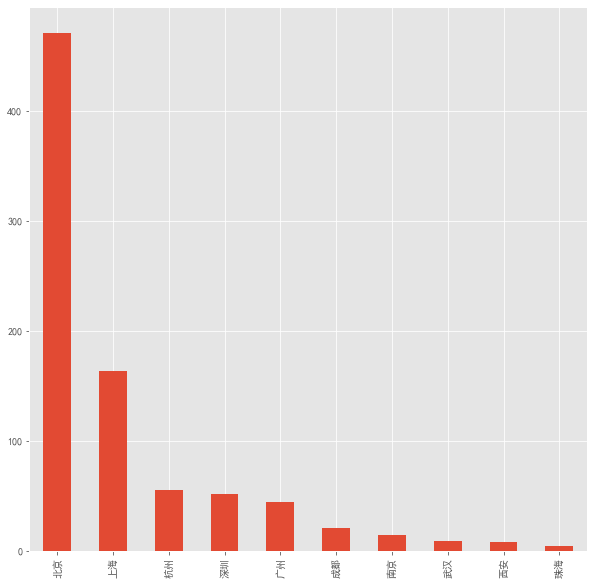

In [38]:
data_clean['city'].value_counts().nlargest(10).plot(kind = 'bar')

In [39]:
list(data['com_class'].unique())

['公司类型：有限责任公司(台港澳法人独资)',
 '公司类型：股份有限公司(上市)',
 '公司类型：有限责任公司(外国法人独资)',
 '无',
 '公司类型：有限责任公司',
 '公司类型：有限责任公司（法人独资）',
 '公司类型：其他有限责任公司',
 ' ',
 '公司类型：其他股份有限公司(非上市)',
 '公司类型：有限责任公司(中外合资)',
 '公司类型：有限责任公司(自然人投资或控股)',
 '公司类型：有限责任公司(自然人独资)',
 '公司类型：有限责任公司（自然人投资或控股）',
 '公司类型：有限责任公司(法人独资)',
 '公司类型：有限责任公司分公司（自然人独资）',
 '公司类型：股份有限公司(中外合资、上市)',
 '公司类型：有限责任公司（台港澳法人独资）',
 '公司类型：有限责任公司\n',
 '公司类型：有限责任公司（自然人独资）',
 '公司类型：有限责任公司（自然人投资或控股的法人独资）',
 '公司类型：股份有限公司(非上市、自然人投资或控股)',
 '公司类型：有限责任公司(台港澳与境内合资)',
 '公司类型：无',
 '公司类型：股份有限公司分公司(上市、国有控股)',
 '公司类型：私营有限责任公司(自然人控股或私营性质企业控股)',
 '公司类型：全民所有制',
 '公司类型：有限责任公司（外国法人独资）',
 '公司类型：股份有限公司(非上市)',
 '公司类型：股份有限公司(上市、自然人投资或控股)',
 '公司类型：股份有限公司(台港澳与境内合资、上市)',
 '公司类型：其他股份有限公司(上市)',
 '公司类型：有限责任公司分公司（非自然人投资或控股的法人独资）',
 '公司类型：其他股份有限公司（上市）',
 '公司类型：有限责任公司（非自然人投资或控股的法人独资）',
 '公司类型：股份有限公司',
 '公司类型：非上市股份有限公司',
 '公司类型：分公司',
 '公司类型：股份有限公司（上市、自然人投资或控股）',
 '公司类型：有限合伙',
 '公司类型：外商投资公司分公司',
 '公司类型：有限责任公司(台港澳与外国投资者合资)',
 '公司类型：股份有限公司（非上市）',
 '公司类型：有限责任公司(外商投资企业法人独资)',
 '公司类型：上市股份有限公司',
 '公司类型：股份

In [40]:
def get_com_type(string):
    if string == None:
        return np.nan
    elif ('非上市' in string) or ('未上市' in string):
        return '股份有限公司（未上市）'
    elif '股份' in string:
        return '股份有限公司（上市）'
    elif '责任' in string:
        return '有限责任公司'
    elif '有限合伙' in string:
        return '有限合伙企业'
    elif '全名所有' in string:
        return '国有企业'
    else:
        return np.nan

In [41]:
com_class = data['com_class'].str.split('：',expand=True)
com_class['com_class'] = com_class[1].apply(get_com_type)
com_class.sample(5)

,0,1,com_class
608,,None,NaN
815,公司类型,有限责任公司(自然人投资或控股),有限责任公司
212,公司类型,有限责任公司(台港澳法人独资),有限责任公司
689,公司类型,其他有限责任公司,有限责任公司
651,公司类型,有限责任公司(台港澳法人独资),有限责任公司


In [42]:
data_clean['com_class'] = com_class['com_class']

In [43]:
data_clean = data_clean.reindex(columns=['com_fullname', 'com_name', 'job_academic', 'job_links', 
                                         'tag','auth_capital', 'day_per_week', 'num_employee', 'time_span',
                                         'average_wage', 'est_date', 'job_deadline', 'released_time',
                                         'update_time', 'city', 'com_class', 'com_intro', 'job_title',
                                         'com_logo', 'industry'])
data_clean.to_csv(r'E:/数据分析数据集/数据挖掘、机器学习算法实习生需求分析/data_cleans.csv', index = False,encoding='utf-8')

In [44]:
data_clean.sample(3)

,com_fullname,com_name,job_academic,job_links,tag,auth_capital,day_per_week,num_employee,time_span,average_wage,est_date,job_deadline,released_time,update_time,city,com_class,com_intro,job_title,com_logo,industry
735,浙江核新同花顺网络信息股份有限公司,同花顺,不限,https://www.shixiseng.com/intern/inn_c5fnpsfzcthq,算法,53760.0000,5,大型企业,7,180.0,2001-08-24,2018-03-27,new,2018-03-15 16:30:20,杭州,股份有限公司（上市）,浙江核新同花顺网络信息股份有限公司成立于1995年，是中国证券信息服务业的第一家上市公司,同花顺--语音识别实习生,https://sxsimg.xiaoyuanzhao.com/A3/50/A33B2E30...,计算机/互联网
825,武汉弦科技有限责任公司,小弦科技,本科,https://www.shixiseng.com/intern/inn_wuoom306jglx,算法,NaN,3,小型企业,3,125.0,NaT,2020-12-03,acceptable,2018-03-12 09:48:04,武汉,NaN,小弦科技是人工智能领域的创业公司，其人工智能产品和解决方案涉及教育、医疗等；至今已服务于20...,算法实习生,https://sxsimg.xiaoyuanzhao.com/18/36/184A0D8F...,"快消,生物/医疗,计算机/互联网"
633,百融（北京）金融信息服务股份有限公司,百融金服,硕士,https://www.shixiseng.com/intern/inn_myskjpw7wves,算法,7350.4982,5,中型企业,3,175.0,2014-03-19,2018-04-02,new,2018-03-19 17:08:32,北京,股份有限公司（未上市）,一家专业提供大数据金融信息服务的公司,算法工程师实习生,https://sxsimg.xiaoyuanzhao.com/D6/13/D61E2DA7...,无


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 977
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   auth_capital    878 non-null    object
 1   city            878 non-null    object
 2   com_class       878 non-null    object
 3   com_fullname    878 non-null    object
 4   com_id          878 non-null    object
 5   com_intro       878 non-null    object
 6   com_links       878 non-null    object
 7   com_location    878 non-null    object
 8   com_logo        878 non-null    object
 9   com_name        878 non-null    object
 10  com_website     878 non-null    object
 11  com_welfare     878 non-null    object
 12  day_per_week    878 non-null    object
 13  detailed_intro  878 non-null    object
 14  est_date        878 non-null    object
 15  industry        878 non-null    object
 16  job_academic    878 non-null    object
 17  job_deadline    878 non-null    object
 18  job_detail

In [46]:
data_clean.loc[data_clean['city']==2].index

Int64Index([], dtype='int64')

In [47]:
data_clean.drop([32, 108, 457, 640, 641, 942],axis=0,inplace=True)

In [48]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 0 to 977
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   com_fullname   872 non-null    object        
 1   com_name       872 non-null    object        
 2   job_academic   872 non-null    object        
 3   job_links      872 non-null    object        
 4   tag            872 non-null    object        
 5   auth_capital   778 non-null    float64       
 6   day_per_week   872 non-null    object        
 7   num_employee   872 non-null    object        
 8   time_span      872 non-null    int64         
 9   average_wage   872 non-null    float64       
 10  est_date       784 non-null    datetime64[ns]
 11  job_deadline   872 non-null    datetime64[ns]
 12  released_time  872 non-null    object        
 13  update_time    872 non-null    datetime64[ns]
 14  city           872 non-null    object        
 15  com_class      788 non-

In [49]:
# 城市与职位数量
city = data_clean['city'].value_counts()
city[:15]

北京    468
上海    162
杭州     55
深圳     52
广州     43
成都     21
南京     14
武汉      9
西安      8
珠海      4
苏州      4
重庆      4
沈阳      4
无       4
合肥      3
Name: city, dtype: int64

(0.0, 500.0)

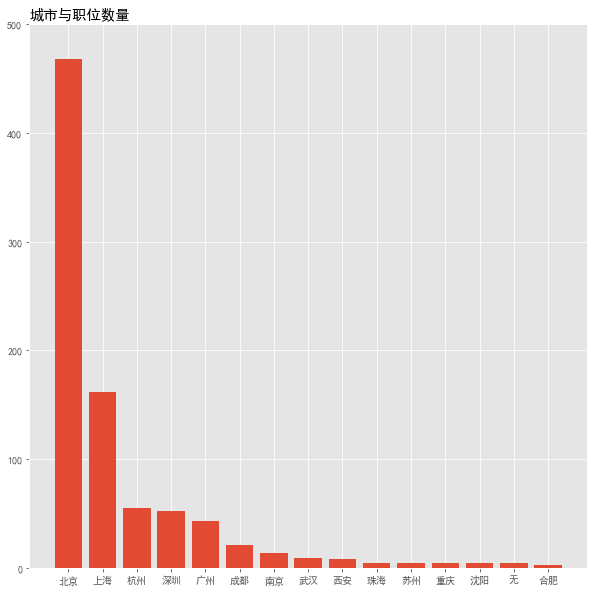

In [50]:
plt.bar(city[:15].index,city[:15].values)
plt.title('城市与职位数量',loc='left')
plt.ylim(0,500)

In [51]:
city_pct = (city/city.sum()).map(lambda x: '{:,.2%}'.format(x))
city_pct[:15]

北京    53.67%
上海    18.58%
杭州     6.31%
深圳     5.96%
广州     4.93%
成都     2.41%
南京     1.61%
武汉     1.03%
西安     0.92%
珠海     0.46%
苏州     0.46%
重庆     0.46%
沈阳     0.46%
无      0.46%
合肥     0.34%
Name: city, dtype: object

In [52]:
(city/city.sum())[:5].sum()

0.8944954128440366

In [53]:
data_clean.loc[data_clean['city'] == '杭州','com_name'].value_counts()[:5]
#data_clean.loc[data_clean['city'] == '杭州']['com_name'].value_counts()[:5]

非白三维    10
光珀       6
虹软       5
同花顺      4
菜鸟网络     3
Name: com_name, dtype: int64

In [54]:
def topN(dataframe, n=5):
    counts = dataframe.value_counts()
    return counts[:n]

In [55]:
data_clean.groupby('city').com_name.apply(topN).loc[list(city_pct[:15].index)]

city               
北京    百度               21
      滴滴出行             19
      今日头条             12
      京东金融             10
      恒润科技              9
上海    华院数据              9
      爱奇艺               8
      驭势科技              7
      名片全能王             4
      纵目科技              4
杭州    非白三维             10
      光珀                6
      虹软                5
      同花顺               4
      菜鸟网络              3
深圳    中科龙智             13
      Webot             4
      SenseTime商汤科技     3
      美图                3
      平安科技              3
广州    网易游戏              5
      探迹                4
      景驰科技              2
      唯品会               2
      欢聚时代（多玩YY）        2
成都    天佑飞天              3
      知道创宇              2
      风雷体育              1
      小多科技              1
      臻识科技              1
南京    南京地平线机器人技术        2
      小黑鱼科技             2
      金智信息              2
      趋势科技              1
      途牛旅游网             1
武汉    小弦科技              2
      乐行                1
      mindsee     

In [56]:
data_clean['salary'] = data_clean['average_wage'] * data_clean['day_per_week']*4
data_clean['salary'].mean()

3657.4977064220184

In [57]:
data_clean['salary'] = data_clean['salary'].astype(float)

In [58]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 0 to 977
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   com_fullname   872 non-null    object        
 1   com_name       872 non-null    object        
 2   job_academic   872 non-null    object        
 3   job_links      872 non-null    object        
 4   tag            872 non-null    object        
 5   auth_capital   778 non-null    float64       
 6   day_per_week   872 non-null    object        
 7   num_employee   872 non-null    object        
 8   time_span      872 non-null    int64         
 9   average_wage   872 non-null    float64       
 10  est_date       784 non-null    datetime64[ns]
 11  job_deadline   872 non-null    datetime64[ns]
 12  released_time  872 non-null    object        
 13  update_time    872 non-null    datetime64[ns]
 14  city           872 non-null    object        
 15  com_class      788 non-

In [59]:
salary_by_city = data_clean.groupby('city')['salary'].mean()
salary_by_city.nlargest(10)

city
晋江    9000.000000
长沙    4500.000000
东莞    4150.000000
杭州    4139.345455
福州    4000.000000
无     3852.000000
北京    3800.547009
深圳    3783.538462
苏州    3775.000000
厦门    3750.000000
Name: salary, dtype: float64

In [60]:
top10_city = salary_by_city[city_pct.index[:10].sort_values(ascending=False)]
top10_city

西安    2317.500000
珠海    2390.000000
深圳    3783.538462
武汉    1912.222222
杭州    4139.345455
成都    2850.000000
广州    3233.488372
南京    3420.857143
北京    3800.547009
上海    3599.901235
Name: salary, dtype: float64

In [61]:
from pyecharts.charts import Bar
from pyecharts import options as opts

In [62]:
list(top10_city.index)

['西安', '珠海', '深圳', '武汉', '杭州', '成都', '广州', '南京', '北京', '上海']

In [63]:
# bar = Bar()
# bar.add_xaxis(list(top10_city.index))
# bar.add_yaxis('北上广深杭等城市平均实习工资',list(np.round(top10_city.values, 0)))
# bar.render_notebook()

In [64]:
bar = (
    Bar()
    .add_xaxis(list(top10_city.index))
    .add_yaxis('北上广深杭等城市平均实习工资',list(np.round(top10_city.values, 0)),
              markpoint_opts = opts.MarkPointOpts(
              data=[opts.MarkPointItem(name='最大值',coord=[list(top10_city.index)[4], list(np.round(top10_city.values, 0))[4]],value=list(np.round(top10_city.values, 0))[4])]))
)
bar.render_notebook()

<AxesSubplot:xlabel='salary', ylabel='city'>

E:\Program Files\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Program Files\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


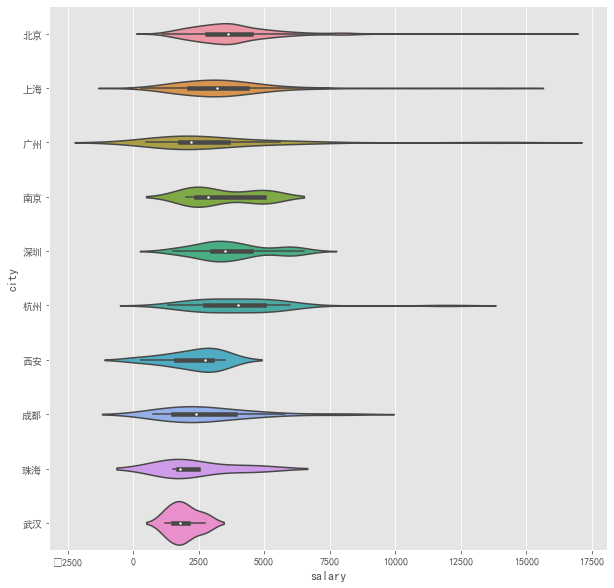

In [65]:
top10_city_box = data_clean.loc[data_clean['city'].isin(top10_city.index)]
sns.violinplot(x='salary',y='city',data=top10_city_box)

In [66]:
job_academic = data_clean['job_academic'].value_counts()
job_academic

本科    432
硕士    265
不限    159
大专     12
博士      4
Name: job_academic, dtype: int64

In [67]:
[list(z) for z in zip(list(job_academic.index),list(job_academic.values))]

[['本科', 432], ['硕士', 265], ['不限', 159], ['大专', 12], ['博士', 4]]

In [68]:
from pyecharts.charts import Pie

In [69]:
# pie = (
#     Pie()
#     .add("",[list(z) for z in zip(list(job_academic.index),list(job_academic.values))])
#     .set_global_opts(title_opts=opts.TitleOpts(title='学历要求'))
#     .set_series_opts(label_opts=opts.LabelOpts(formatter='{b}:{c}'))
# )
# pie.render_notebook()

([<matplotlib.patches.Wedge at 0x1dd598ef700>,
 [Text(0.015851481831154847, 1.0998857806716826, '本科'),
  Text(-0.6612225407949996, -0.8790817661313453, '硕士'),
  Text(0.8496826561445616, -0.6985981562007751, '不限'),
  Text(1.0971456896493563, -0.07919176525269761, '大专'),
  Text(1.099885780532546, -0.015851491485412077, '博士')],
 [Text(0.008646262816993551, 0.5999376985481905, '49.5%'),
  Text(-0.36066684043363617, -0.4794991451625519, '30.4%'),
  Text(0.46346326698794266, -0.38105353974587736, '18.2%'),
  Text(0.5984431034451034, -0.04319550831965324, '1.4%'),
  Text(0.5999376984722977, -0.008646268082952041, '0.5%')])

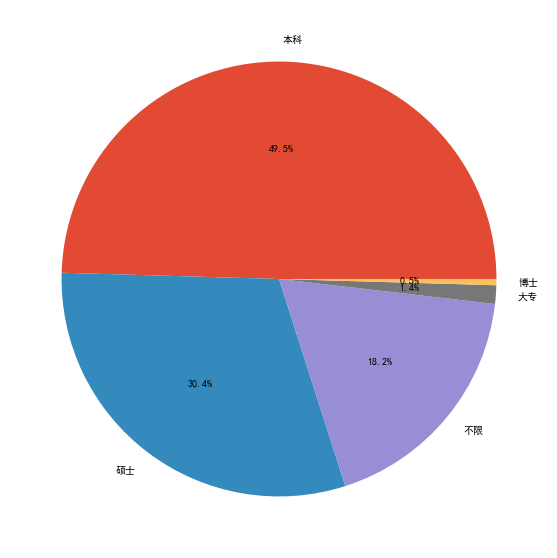

In [70]:
plt.pie(job_academic,labels=['本科','硕士','不限','大专','博士'],autopct='%1.1f%%')

<AxesSubplot:xlabel='job_academic', ylabel='salary'>

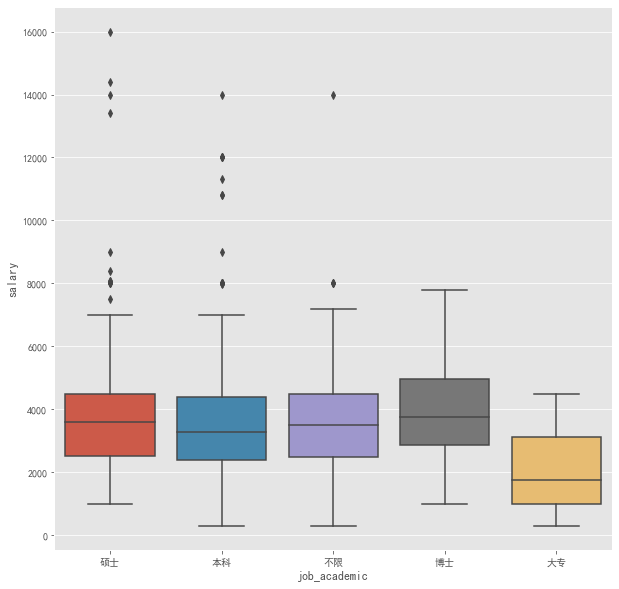

In [71]:
sns.boxplot(x='job_academic',y='salary',data=data_clean)

In [72]:
data_clean['industry'].sample(5)

685    计算机/互联网
85        企业服务
301    计算机/互联网
440    计算机/互联网
391      移动互联网
Name: industry, dtype: object

In [73]:
industry = data_clean.industry.str.split('/|,|,',expand=True)
industry

,0,1,2,3,4
0,计算机,互联网,None,None,None
1,计算机,互联网,None,None,None
2,互联网,None,None,None,None
3,互联网,None,None,None,None
4,互联网,None,None,None,None
...,...,...,...,...,...
972,无,None,None,None,None
973,计算机,互联网,None,None,None
974,互联网,None,None,None,None
976,无,None,None,None,None


In [74]:
industry_top15 = industry.apply(pd.value_counts).sum(axis=1).nlargest(15)

In [75]:
bar = (
    Bar()
    .add_xaxis(list(industry_top15.index))
    .add_yaxis('行业与职位数量',list(industry_top15.values))
    .set_series_opts(
        label_opts=opts.LabelOpts(is_show=False),
        markpoint_opts=opts.MarkPointOpts(
        data=[
            opts.MarkPointItem(type_='max',name='最大值'),
            opts.MarkPointItem(type_='min',name='最小值'),
            opts.MarkPointItem(type_='averge',name='平均值'),
        ]
        ),
    )
)
bar.render_notebook()

In [76]:
data_clean.groupby('com_name').salary.agg(['count','mean']).sort_values(by='count',ascending=False)[:15]

,count,mean
com_name,,
百度,21,3256.190476
滴滴出行,19,3614.736842
中科龙智,13,3000.000000
今日头条,12,6400.500000
爱奇艺,12,3983.166667
京东金融,10,4845.000000
非白三维,10,5150.000000
作业帮,9,3444.444444
华院数据,9,3455.555556


In [77]:
data_clean['num_employee'].value_counts()

小型企业    351
中型企业    282
大型企业    233
无         6
Name: num_employee, dtype: int64

In [78]:
data_clean.groupby('num_employee')['salary'].mean()

num_employee
中型企业    3641.035461
大型企业    3504.420601
小型企业    3769.595442
无       3818.000000
Name: salary, dtype: float64

In [79]:
data_clean['time_span'].value_counts()

3     288
6     190
4     112
7      71
5      66
8      35
10     34
13     20
12     16
9      11
11      8
15      6
16      4
14      4
2       3
18      2
17      1
1       1
Name: time_span, dtype: int64

In [80]:
data_clean['time_span'].mean()

5.513761467889908

In [85]:
est_date = data_clean.drop_duplicates(subset='com_name')

In [87]:
est_date['est_date']

0     2004-12-07
1     1995-09-22
2     2002-10-15
3     2000-01-18
5            NaT
         ...    
970   1992-12-24
971   1994-01-19
973   2005-08-03
974   2008-08-07
977   1998-01-24
Name: est_date, Length: 459, dtype: datetime64[ns]

In [88]:
import warnings
warnings.filterwarnings('ignore')
est_date['est_year'] = pd.DatetimeIndex(est_date['est_date']).year
num_com_by_year = est_date.groupby('est_year')['com_name'].count()

In [89]:
from pyecharts.charts import Line

In [105]:
# line = (
#     Line()
#     .add_xaxis(list(num_com_by_year.index))
#     .add_yaxis(
#         '',
#         list(num_com_by_year.values),
#         markpoint_opts=opts.MarkPointOpts(data=[
#             opts.MarkPointItem(type_='max',name='最大值'),
#             opts.MarkPointItem(type_='averge',name='平均值'),])
#         )
#     .set_global_opts(title_opts=opts.TitleOpts(title='每年新成立的公司数量变化')
#         )
# )
# line.render_notebook()

In [106]:
scale_VS_year = est_date.groupby(['num_employee', 'est_year'])['com_name'].count()
scale_VS_year_s = scale_VS_year['小型企业'].reindex(num_com_by_year.index,fill_value=0)
scale_VS_year_m = scale_VS_year['中型企业'].reindex(num_com_by_year.index,fill_value=0)
scale_VS_year_l = scale_VS_year['大型企业'].reindex(num_com_by_year.index,fill_value=0)

In [108]:
E_data = data_clean.loc[(data_clean['city'] == '深圳') & 
               (data_clean['job_academic'] != '博士') & 
               (data_clean['time_span'].isin([1,2,3])) & 
               (data_clean['salary'] > 3784) & 
               (data_clean['released_time'] == 'newest'), :]
E_data['com_name'].unique()

array(['腾讯'], dtype=object)

In [110]:
E_data.index

Int64Index([40, 41, 43], dtype='int64')

In [111]:
data.loc[E_data.index, ['job_title', 'job_links']]

,job_title,job_links
40,【2019届】数据挖掘机器学习算法工程师,https://www.shixiseng.com/intern/inn_btgg1xncafqz
41,【2019届】数据挖掘机器学习算法工程师,https://www.shixiseng.com/intern/inn_ybmp6yecb0ar
43,【2019届】大数据挖掘算法工程师,https://www.shixiseng.com/intern/inn_v29ipnaojqiw
